In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.shape

(520, 17)

In [4]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [5]:
#data preprocessing

In [6]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [7]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [8]:
def convert_toboolean(column_name):
    df[column_name] = df[column_name].map({'Yes':1,'No':0})
list_columnname = ['Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']
for i in list_columnname:
    convert_toboolean(i)

In [9]:
df['class']=df['class'].map({'Positive':1,'Negative':0})

In [10]:
df.head(3)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1


In [11]:
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#eda

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

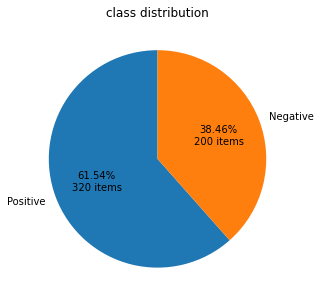

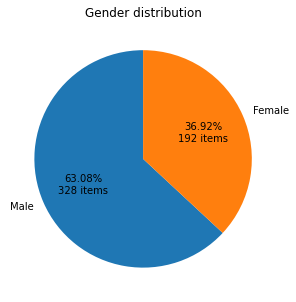

In [14]:
def plotPie(value, title, label):
    plt.figure(figsize=(5,5))
    plt.pie(
        value.value_counts(),
        startangle=90,
        labels = label,
        autopct=(lambda p:f'{p:.2f}%\n{p*sum(value.value_counts())/100 :.0f} items')
    )
    plt.title(title)
    plt.show()
plotPie(df["class"], "class distribution", ["Positive", "Negative"])
plotPie(df["Gender"], "Gender distribution", ["Male", "Female"])

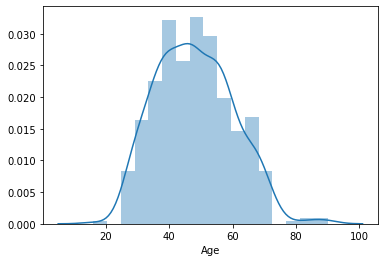

In [15]:
sns.distplot(df['Age'])
plt.show()

In [16]:
df_pos = df[df["class"] == 1]
df_neg = df[df["class"] == 0]

In [17]:
print("Average positive age:", df_pos["Age"].mean())
print("Average negative age:", df_neg["Age"].mean())

Average positive age: 49.071875
Average negative age: 46.36


# Occurrences of symptoms in all patients

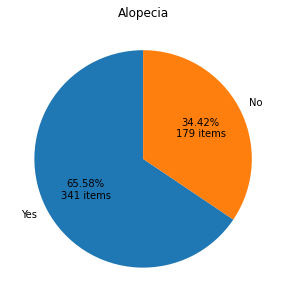

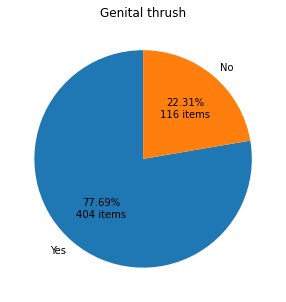

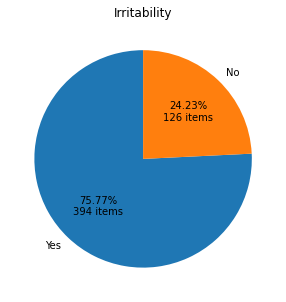

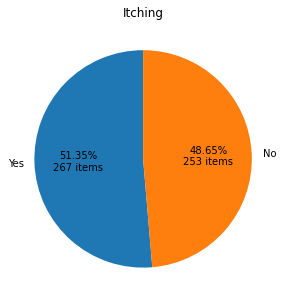

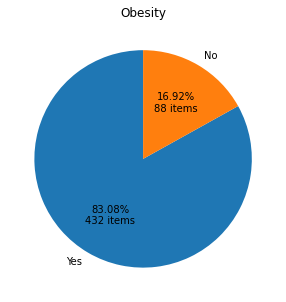

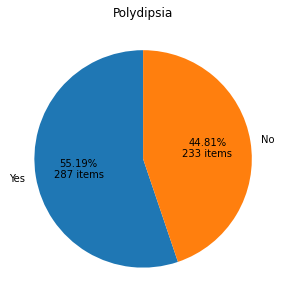

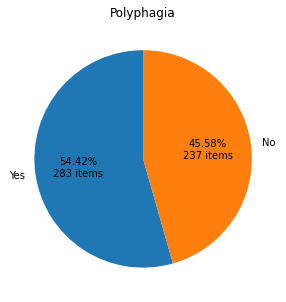

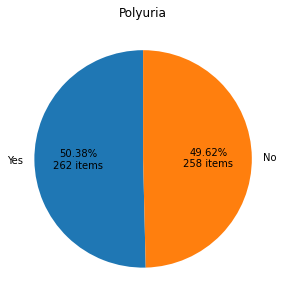

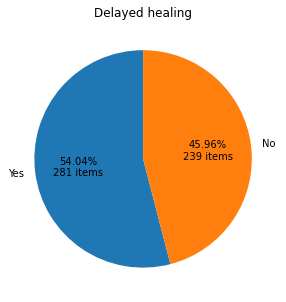

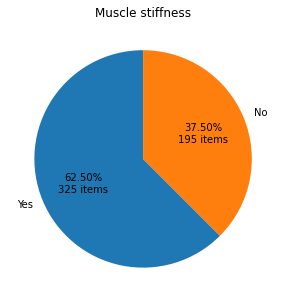

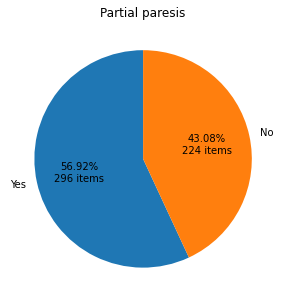

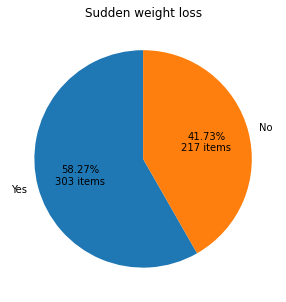

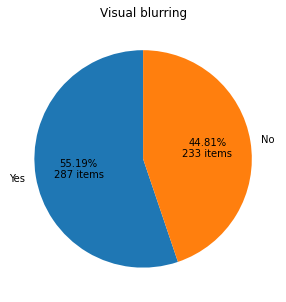

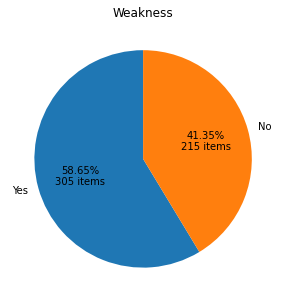

In [18]:
# Select all columns except these three
df_symptoms = df[df.columns.difference(["Age", "class", "Gender"])]

for column in df_symptoms.columns:
    plotPie(df_symptoms[column], column.capitalize(), ["Yes", "No"])

In [19]:
'''Occurences of symptoms in positive patients
df_symptoms = df_pos[df_pos.columns.difference(["age", "status", "gender"])]

for column in df_symptoms.columns:
    plotPie(df_symptoms[column], column.capitalize(), ["Yes", "No"])'''
'''Occurences of symptoms in negative patients
df_symptoms = df_neg[df_neg.columns.difference(["age", "status", "gender"])]

for column in df_symptoms.columns:
    plotPie(df_symptoms[column], column.capitalize(), ["Yes", "No"])'''

'Occurences of symptoms in negative patients\ndf_symptoms = df_neg[df_neg.columns.difference(["age", "status", "gender"])]\n\nfor column in df_symptoms.columns:\n    plotPie(df_symptoms[column], column.capitalize(), ["Yes", "No"])'

# realtion between symptoms and class

<AxesSubplot:xlabel='class', ylabel='count'>

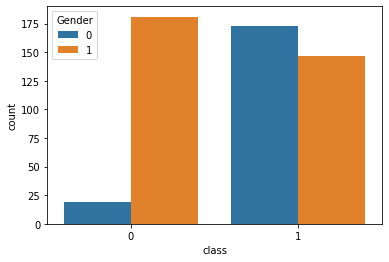

In [20]:
#gender
sns.countplot(x='class',data=df,hue='Gender')

<AxesSubplot:xlabel='class', ylabel='count'>

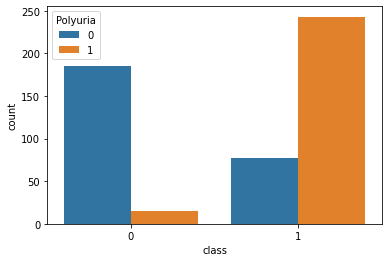

In [21]:
#polyuria
sns.countplot(x='class',data=df,hue='Polyuria')

<AxesSubplot:xlabel='class', ylabel='count'>

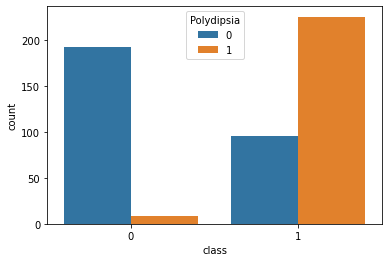

In [22]:
#polydipsia
sns.countplot(x='class',data=df,hue='Polydipsia')

<AxesSubplot:xlabel='class', ylabel='count'>

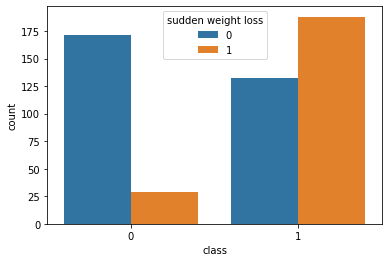

In [23]:
#sudden weight loss
sns.countplot(x='class',data=df,hue='sudden weight loss')

<AxesSubplot:xlabel='class', ylabel='count'>

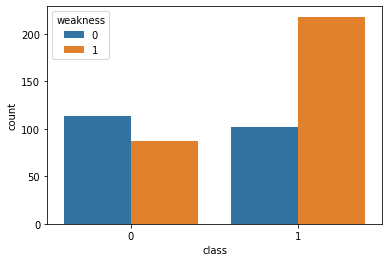

In [24]:
#weakness
sns.countplot(x='class',data=df,hue='weakness')

<AxesSubplot:xlabel='class', ylabel='count'>

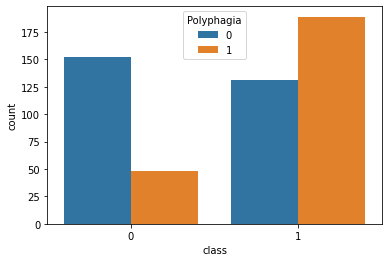

In [25]:
#polyphagia
sns.countplot(x='class',data=df,hue='Polyphagia')

<AxesSubplot:xlabel='class', ylabel='count'>

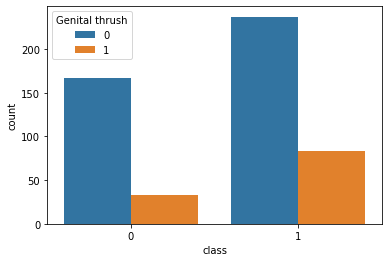

In [26]:
#genital thrush
sns.countplot(x='class',data=df,hue='Genital thrush')

<AxesSubplot:xlabel='class', ylabel='count'>

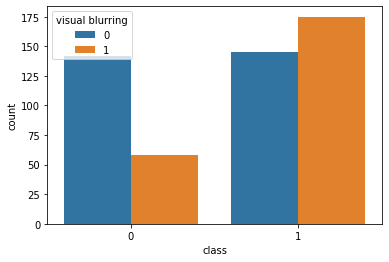

In [27]:
#visual blurring
sns.countplot(x='class',data=df,hue='visual blurring')

<AxesSubplot:xlabel='class', ylabel='count'>

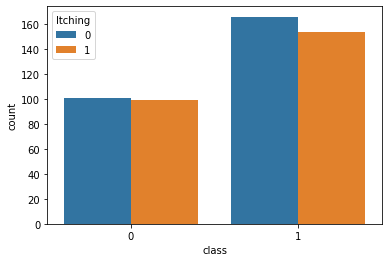

In [28]:
#itching
sns.countplot(x='class',data=df,hue='Itching')

<AxesSubplot:xlabel='class', ylabel='count'>

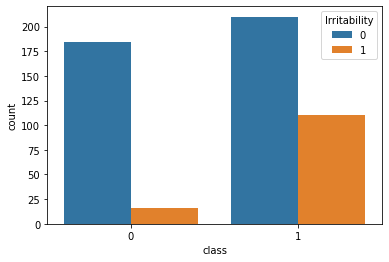

In [29]:
#irritability
sns.countplot(x='class',data=df,hue='Irritability')

<AxesSubplot:xlabel='class', ylabel='count'>

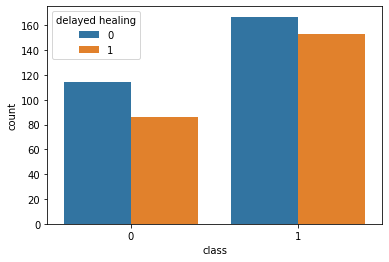

In [30]:
#delayed healing
sns.countplot(x='class',data=df,hue='delayed healing')

<AxesSubplot:xlabel='class', ylabel='count'>

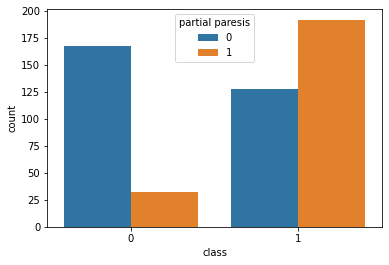

In [31]:
#Partial paresis
sns.countplot(x='class',data=df,hue='partial paresis')

<AxesSubplot:xlabel='class', ylabel='count'>

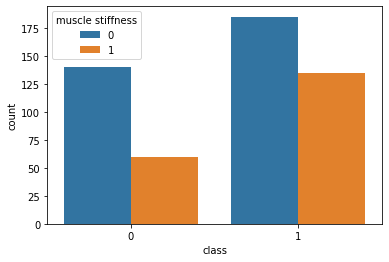

In [32]:
#muscle stiffness
sns.countplot(x='class',data=df,hue='muscle stiffness')

<AxesSubplot:xlabel='class', ylabel='count'>

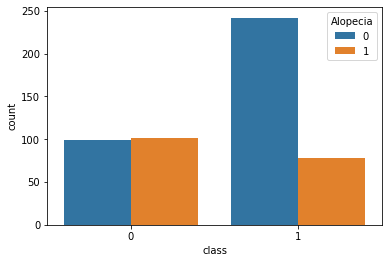

In [33]:
#alopecia
sns.countplot(x='class',data=df,hue='Alopecia')

<AxesSubplot:xlabel='class', ylabel='count'>

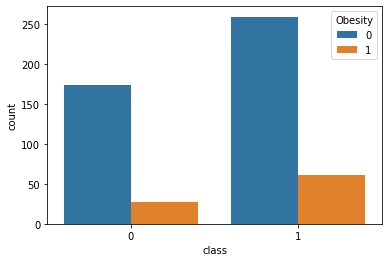

In [34]:
#obesity
sns.countplot(x='class',data=df,hue='Obesity')

# corelation

In [35]:
corrdata = df.corr()

<AxesSubplot:>

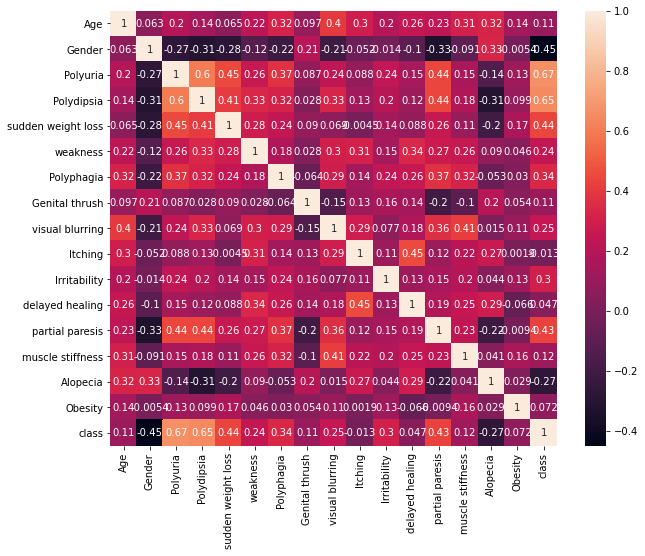

In [36]:
ax,fig = plt.subplots(figsize=(10,8))
sns.heatmap(corrdata,annot=True)

In [37]:
feat_corr = df.corr()["class"].to_frame()
feat_corr

,class
Age,0.108679
Gender,-0.449233
Polyuria,0.665922
Polydipsia,0.648734
sudden weight loss,0.436568
weakness,0.243275
Polyphagia,0.342504
Genital thrush,0.110288
visual blurring,0.251300
Itching,-0.013384


In [38]:
feat_corr["class"] = abs(feat_corr["class"])
feat_corr = feat_corr.sort_values(by="class", ascending=False).reset_index(drop=False)
feat_corr = feat_corr[1:11]["index"].to_numpy()
feat_corr

array(['Polyuria', 'Polydipsia', 'Gender', 'sudden weight loss',
       'partial paresis', 'Polyphagia', 'Irritability', 'Alopecia',
       'visual blurring', 'weakness'], dtype=object)

# Feature selection using selectkbest

In [39]:
X=df[feat_corr]
y=df['class']

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X,y)
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X.columns)
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']

In [41]:
print(featurescores.nlargest(10,'scores'))

               column      scores
1          Polydipsia  120.785515
0            Polyuria  116.184593
3  sudden weight loss   57.749309
4     partial paresis   55.314286
2              Gender   38.747637
6        Irritability   35.334127
5          Polyphagia   33.198418
7            Alopecia   24.402793
8     visual blurring   18.124571
9            weakness   12.724262


<AxesSubplot:>

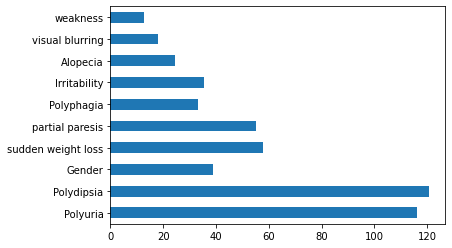

In [42]:
featureview=pd.Series(fit.scores_, index=X.columns)
featureview.plot(kind='barh')

# splitting data

In [43]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state=1)

# Standardization of independant variables

In [44]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# model building

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
x_pred=lr.predict(X_train)
y_pred=lr.predict(X_test)

In [48]:
from sklearn import metrics
metrics.accuracy_score(y_train,x_pred)

0.9093406593406593

In [49]:
metrics.accuracy_score(y_test,y_pred)

0.9102564102564102

# naive bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [51]:
x_pred=nb.predict(X_train)
y_pred=nb.predict(X_test)

In [52]:
metrics.accuracy_score(y_train,x_pred)

0.9010989010989011

In [53]:
metrics.accuracy_score(y_test,y_pred)

0.9038461538461539

# decision tree

In [54]:
from sklearn import tree

In [56]:
dt=tree.DecisionTreeClassifier(random_state = 1,max_depth=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [57]:
x_pred=dt.predict(X_train)
y_pred=dt.predict(X_test)

In [58]:
metrics.accuracy_score(y_train,x_pred)

0.9807692307692307

In [59]:
metrics.accuracy_score(y_test,y_pred)

0.9615384615384616

# random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=120)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=120)

In [61]:
x_pred=rf.predict(X_train)
y_pred=rf.predict(X_test)

In [62]:
metrics.accuracy_score(y_train,x_pred)

0.9807692307692307

In [63]:
metrics.accuracy_score(y_test,y_pred)

0.967948717948718

# knn

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
x_pred=knn.predict(X_train)
y_pred=knn.predict(X_test)

In [66]:
metrics.accuracy_score(y_train,x_pred)

0.9368131868131868

In [67]:
metrics.accuracy_score(y_test,y_pred)

0.9038461538461539

In [68]:
#xgboost

In [69]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
x_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)

In [71]:
metrics.accuracy_score(y_train,x_pred)

0.978021978021978

In [72]:
metrics.accuracy_score(y_test,y_pred)

0.9551282051282052